### Common data problems

In [1]:
# Importing librairies 
import pandas as pd 
import numpy as np
from datetime import datetime as dt
import missingno as msno
import matplotlib.pyplot as plt

# Importing Dataset
ride_sharing = pd.read_csv('ride_sharing_new.csv', header=0, index_col='Unnamed: 0')

# Show the first 10 lines of the DataFrame
print(ride_sharing.head())

     duration  station_A_id  \
0  12 minutes            81   
1  24 minutes             3   
2   8 minutes            67   
3   4 minutes            16   
4  11 minutes            22   

                                      station_A_name  station_B_id  \
0                                 Berry St at 4th St           323   
1       Powell St BART Station (Market St at 4th St)           118   
2  San Francisco Caltrain Station 2  (Townsend St...            23   
3                            Steuart St at Market St            28   
4                              Howard St at Beale St           350   

                    station_B_name  bike_id  user_type  user_birth_year  \
0               Broadway at Kearny     5480          2             1959   
1  Eureka Valley Recreation Center     5193          2             1965   
2    The Embarcadero at Steuart St     3652          3             1993   
3     The Embarcadero at Bryant St     1883          1             1979   
4             8th

In [2]:
# Print the information of ride_sharing
print(ride_sharing.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25760 entries, 0 to 25759
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   duration         25760 non-null  object
 1   station_A_id     25760 non-null  int64 
 2   station_A_name   25760 non-null  object
 3   station_B_id     25760 non-null  int64 
 4   station_B_name   25760 non-null  object
 5   bike_id          25760 non-null  int64 
 6   user_type        25760 non-null  int64 
 7   user_birth_year  25760 non-null  int64 
 8   user_gender      25760 non-null  object
dtypes: int64(5), object(4)
memory usage: 2.0+ MB
None


In [3]:
# Print summary statistics of user_type column
print(ride_sharing['user_type'].describe())

count    25760.000000
mean         2.008385
std          0.704541
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max          3.000000
Name: user_type, dtype: float64


THE "user-type" COLUMN HAS AN FINTE STE OF POSSIBLE VALUES THAT REPRESENT GROUPINGS OF DATA, IT SHOULD BE CONVERTED TO "category"

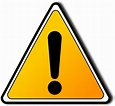

##### Summing strings and concatenating numbers

In [4]:
# Print the information of ride_sharing
print(ride_sharing.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25760 entries, 0 to 25759
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   duration         25760 non-null  object
 1   station_A_id     25760 non-null  int64 
 2   station_A_name   25760 non-null  object
 3   station_B_id     25760 non-null  int64 
 4   station_B_name   25760 non-null  object
 5   bike_id          25760 non-null  int64 
 6   user_type        25760 non-null  int64 
 7   user_birth_year  25760 non-null  int64 
 8   user_gender      25760 non-null  object
dtypes: int64(5), object(4)
memory usage: 2.0+ MB
None


In [5]:
# Print summary statistics of user_type column
print(ride_sharing['user_type'].describe())

count    25760.000000
mean         2.008385
std          0.704541
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max          3.000000
Name: user_type, dtype: float64


In [6]:
# Convert user_type from integer to category
ride_sharing['user_type_cat'] = ride_sharing['user_type'].astype('category')

In [7]:
# Write an assert statement confirming the change
assert ride_sharing['user_type_cat'].dtype == 'category'

No Error so everything is supposed to be okey, Let's check

In [8]:
# Print new summary statistics 
print(ride_sharing['user_type_cat'].describe())

count     25760
unique        3
top           2
freq      12972
Name: user_type_cat, dtype: int64


In [9]:
# Check duration type
ride_sharing['duration'].head()

0    12 minutes
1    24 minutes
2     8 minutes
3     4 minutes
4    11 minutes
Name: duration, dtype: object

In [10]:
ride_sharing['duration'].dtype == 'int'

False

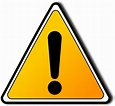

Duration type is object, but it should be integer isn't ? 

Let's correct it

In [11]:
# Strip duration of minutes
ride_sharing['duration_trim'] = ride_sharing['duration'].str.strip("minutes")

# Convert duration to integer
ride_sharing['duration_time'] = ride_sharing['duration_trim'].astype('int')

# Write an assert statement making sure of conversion
assert ride_sharing['duration_time'].dtype == 'int'

In [12]:
# Print formed columns and calculate average ride duration 
print(ride_sharing[['duration','duration_trim','duration_time']], end="\n \n")

print("the average ride duration's : \t", ride_sharing['duration_time'].mean())

         duration duration_trim  duration_time
0      12 minutes           12              12
1      24 minutes           24              24
2       8 minutes            8               8
3       4 minutes            4               4
4      11 minutes           11              11
...           ...           ...            ...
25755  11 minutes           11              11
25756  10 minutes           10              10
25757  14 minutes           14              14
25758  14 minutes           14              14
25759  29 minutes           29              29

[25760 rows x 3 columns]
 
the average ride duration's : 	 11.389052795031056


##### Tire size constraints

Let's make sure the tire_sizes column has the correct range by first converting it to an integer, then setting and testing the new upper limit of 27″ for tire sizes.

Bicycle tire sizes could be either 26″, 27″ or 29″ and are here correctly stored as a categorical value. In an effort to cut maintenance costs, the ride sharing provider decided to set the maximum tire size to be 27″.

In [13]:
# Define the tire sizes and their probabilities
tire_sizes = ["26", "27", "29"]
probabilities = [0.4, 0.4, 0.2]  # Adjust the probabilities as needed

# Add a new column 'tire_sizes' with random distributions
ride_sharing['tire_sizes'] = np.random.choice(tire_sizes, size=len(ride_sharing), p=probabilities)

# Convert user_type from integer to category
ride_sharing['tire_sizes'] = ride_sharing['tire_sizes'].astype('category')

# Print the updated DataFrame infos
print(ride_sharing.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25760 entries, 0 to 25759
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   duration         25760 non-null  object  
 1   station_A_id     25760 non-null  int64   
 2   station_A_name   25760 non-null  object  
 3   station_B_id     25760 non-null  int64   
 4   station_B_name   25760 non-null  object  
 5   bike_id          25760 non-null  int64   
 6   user_type        25760 non-null  int64   
 7   user_birth_year  25760 non-null  int64   
 8   user_gender      25760 non-null  object  
 9   user_type_cat    25760 non-null  category
 10  duration_trim    25760 non-null  object  
 11  duration_time    25760 non-null  int32   
 12  tire_sizes       25760 non-null  category
dtypes: category(2), int32(1), int64(5), object(5)
memory usage: 2.3+ MB
None


In [14]:
print(ride_sharing['tire_sizes'].head())

0    29
1    26
2    27
3    26
4    27
Name: tire_sizes, dtype: category
Categories (3, object): ['26', '27', '29']


In [15]:
# Strip " ' "
ride_sharing['tire_sizes'] = ride_sharing['tire_sizes'].str.strip("'")

# Convert tire_sizes to integer
ride_sharing['tire_sizes'] = ride_sharing['tire_sizes'].astype('int')

# Set all values above 27 to 27
ride_sharing.loc[ride_sharing['tire_sizes'] > 27, 'tire_sizes'] = 27

# Reconvert tire_sizes back to categorical
ride_sharing['tire_sizes'] = ride_sharing['tire_sizes'].astype('category')

# Print tire size description
print(ride_sharing['tire_sizes'].describe())

count     25760
unique        2
top          27
freq      15441
Name: tire_sizes, dtype: int64


##### Finding duplicates

In [16]:
# Find duplicates
duplicates = ride_sharing.duplicated(subset='bike_id', keep=False)

# Sort your duplicated rides
duplicated_rides = ride_sharing[duplicates].sort_values('bike_id')

# Print relevant columns of duplicated_rides
print(duplicated_rides[['bike_id','duration','user_birth_year']])

       bike_id    duration  user_birth_year
3638        11  12 minutes             1988
6088        11   5 minutes             1985
10857       11   4 minutes             1987
10045       27  13 minutes             1989
16104       27  10 minutes             1970
...        ...         ...              ...
8812      6638  10 minutes             1986
6815      6638   5 minutes             1995
8456      6638   7 minutes             1983
8300      6638   6 minutes             1962
8380      6638   8 minutes             1984

[25717 rows x 3 columns]


##### Treating duplicates

In [17]:
# Strip duration of minutes
ride_sharing['duration'] = ride_sharing['duration'].str.strip("minutes")

# Convert duration to integer
ride_sharing['duration'] = ride_sharing['duration'].astype('int')

# Write an assert statement making sure of conversion
assert ride_sharing['duration'].dtype == 'int'

In [18]:
# Drop complete duplicates from ride_sharing
ride_dup = ride_sharing.drop_duplicates()

# Create statistics dictionary for aggregation function
statistics = {'user_birth_year': 'min', 'duration': 'mean'}

# Group by ride_id and compute new statistics
ride_unique = ride_dup.groupby('bike_id').agg(statistics).reset_index()

# Find duplicated values again
duplicates = ride_unique.duplicated(subset = 'bike_id', keep = False)
duplicated_rides = ride_unique[duplicates == True]

# Assert duplicates are processed
assert duplicated_rides.shape[0] == 0

### Text and categorical data problems

##### Finding consistency

In [19]:
#Import airlines DataFrame 
airlines = pd.read_csv('airlines_final.csv', index_col='Unnamed: 0')

print(airlines.head(5))

     id        day      airline        destination    dest_region dest_size  \
0  1351    Tuesday  UNITED INTL             KANSAI           Asia       Hub   
1   373     Friday       ALASKA  SAN JOSE DEL CABO  Canada/Mexico     Small   
2  2820   Thursday        DELTA        LOS ANGELES        West US       Hub   
3  1157    Tuesday    SOUTHWEST        LOS ANGELES        West US       Hub   
4  2992  Wednesday     AMERICAN              MIAMI        East US       Hub   

  boarding_area   dept_time  wait_min     cleanliness         safety  \
0  Gates 91-102  2018-12-31     115.0           Clean        Neutral   
1   Gates 50-59  2018-12-31     135.0           Clean      Very safe   
2   Gates 40-48  2018-12-31      70.0         Average  Somewhat safe   
3   Gates 20-39  2018-12-31     190.0           Clean      Very safe   
4   Gates 50-59  2018-12-31     559.0  Somewhat clean      Very safe   

         satisfaction  
0      Very satisfied  
1      Very satisfied  
2             Neutra

In [20]:
# Create categories DataFrame
data = {
    'cleanliness': ['Clean', 'Average', 'Somewhat clean', 'Somewhat dirty', 'Dirty'],
    'safety': ['Neutral', 'Very safe', 'Somewhat safe', 'Very unsafe', 'Somewhat unsafe'],
    'satisfaction': ['Very satisfied', 'Neutral', 'Somewhat satisfied', 'Somewhat unsatisfied', 'Very unsatisfied']
}
# Create Categries DataFrame
categories = pd.DataFrame(data)
print(categories)

      cleanliness           safety          satisfaction
0           Clean          Neutral        Very satisfied
1         Average        Very safe               Neutral
2  Somewhat clean    Somewhat safe    Somewhat satisfied
3  Somewhat dirty      Very unsafe  Somewhat unsatisfied
4           Dirty  Somewhat unsafe      Very unsatisfied


In [21]:
# Print unique values of survey columns in airlines
print('Cleanliness: ', airlines['cleanliness'].unique(), "\n")
print('Safety: ', airlines['safety'].unique(), "\n")
print('Satisfaction: ', airlines['satisfaction'].unique(), "\n")

Cleanliness:  ['Clean' 'Average' 'Somewhat clean' 'Somewhat dirty' 'Dirty'] 

Safety:  ['Neutral' 'Very safe' 'Somewhat safe' 'Very unsafe' 'Somewhat unsafe'] 

Satisfaction:  ['Very satisfied' 'Neutral' 'Somewhat satsified' 'Somewhat unsatisfied'
 'Very unsatisfied'] 



In [22]:
# Find the cleanliness category in airlines not in categories
cat_clean = set(airlines['cleanliness']).difference(categories['cleanliness'])

# Find rows with that category
cat_clean_rows = airlines['cleanliness'].isin(cat_clean)

# Print rows with inconsistent category
print(airlines[cat_clean_rows])

Empty DataFrame
Columns: [id, day, airline, destination, dest_region, dest_size, boarding_area, dept_time, wait_min, cleanliness, safety, satisfaction]
Index: []


In [23]:
# Print rows with consistent categories only
print(airlines[~cat_clean_rows])

        id        day        airline        destination    dest_region  \
0     1351    Tuesday    UNITED INTL             KANSAI           Asia   
1      373     Friday         ALASKA  SAN JOSE DEL CABO  Canada/Mexico   
2     2820   Thursday          DELTA        LOS ANGELES        West US   
3     1157    Tuesday      SOUTHWEST        LOS ANGELES        West US   
4     2992  Wednesday       AMERICAN              MIAMI        East US   
...    ...        ...            ...                ...            ...   
2804  1475    Tuesday         ALASKA       NEW YORK-JFK        East US   
2805  2222   Thursday      SOUTHWEST            PHOENIX        West US   
2806  2684     Friday         UNITED            ORLANDO        East US   
2807  2549    Tuesday        JETBLUE         LONG BEACH        West US   
2808  2162   Saturday  CHINA EASTERN            QINGDAO           Asia   

     dest_size boarding_area   dept_time  wait_min     cleanliness  \
0          Hub  Gates 91-102  2018-12-31 

In [24]:
# Print unique values of both columns
print(airlines['dest_region'].unique(), '\n \n')
print("***"*5, '\n\n')
print(airlines['dest_size'].unique())

['Asia' 'Canada/Mexico' 'West US' 'East US' 'Midwest US' 'EAST US'
 'Middle East' 'Europe' 'eur' 'Central/South America'
 'Australia/New Zealand' 'middle east'] 
 

*************** 


['Hub' 'Small' '    Hub' 'Medium' 'Large' 'Hub     ' '    Small'
 'Medium     ' '    Medium' 'Small     ' '    Large' 'Large     ']


In [25]:
# Create ranges for categories
label_ranges = [0, 60, 180, np.inf]
label_names = ['short', 'medium', 'long']

# Create wait_type column
airlines['wait_type'] = pd.cut(airlines['wait_min'], bins = label_ranges, 
                                labels = label_names)

# Create mappings and replace
mappings = {'Monday': 'weekday',
    'Tuesday': 'weekday',
    'Wednesday': 'weekday',
    'Thursday': 'weekday',
    'Friday': 'weekday',
    'Saturday': 'weekend',
    'Sunday': 'weekend'}

airlines['day_week'] = airlines['day'].replace(mappings)

In [26]:
# Print unique values of both columns
print(airlines['wait_type'].unique(), '\n')
print("***"*20, '\n')
print(airlines['day_week'].unique())

['medium', 'long', 'short']
Categories (3, object): ['short' < 'medium' < 'long'] 

************************************************************ 

['weekday' 'weekend']


In [27]:
#Show  Airlines DataFrame
print(airlines.head(5))

     id        day      airline        destination    dest_region dest_size  \
0  1351    Tuesday  UNITED INTL             KANSAI           Asia       Hub   
1   373     Friday       ALASKA  SAN JOSE DEL CABO  Canada/Mexico     Small   
2  2820   Thursday        DELTA        LOS ANGELES        West US       Hub   
3  1157    Tuesday    SOUTHWEST        LOS ANGELES        West US       Hub   
4  2992  Wednesday     AMERICAN              MIAMI        East US       Hub   

  boarding_area   dept_time  wait_min     cleanliness         safety  \
0  Gates 91-102  2018-12-31     115.0           Clean        Neutral   
1   Gates 50-59  2018-12-31     135.0           Clean      Very safe   
2   Gates 40-48  2018-12-31      70.0         Average  Somewhat safe   
3   Gates 20-39  2018-12-31     190.0           Clean      Very safe   
4   Gates 50-59  2018-12-31     559.0  Somewhat clean      Very safe   

         satisfaction wait_type day_week  
0      Very satisfied    medium  weekday  
1     

##### Cleaning text data

In [28]:
# Replace "Gates" with empty string ""
airlines['boarding_area'] = airlines['boarding_area'].str.replace("Gates","")

# Assert that full_name has no honorifics
assert airlines['boarding_area'].str.contains('Gates').any() == False

In [29]:
# Store length of each row in survey_response column
resp_length = airlines['satisfaction'].str.len()

#Check Unique values lengths
resp_length.unique()

array([14,  7, 18, 20, 16], dtype=int64)

In [30]:
# Find rows in airlines where resp_length > 40
airlines_survey = airlines[resp_length > 7]

# Assert minimum survey_response length is > 40
assert airlines_survey['satisfaction'].str.len().min() > 7

In [31]:
# Print new survey_response column
print(airlines_survey['satisfaction'])

0           Very satisfied
1           Very satisfied
3       Somewhat satsified
4       Somewhat satsified
5           Very satisfied
               ...        
2804    Somewhat satsified
2805        Very satisfied
2806        Very satisfied
2807        Very satisfied
2808    Somewhat satsified
Name: satisfaction, Length: 1991, dtype: object


In [32]:
#Check Unique values lengths
airlines_survey['satisfaction'].str.len().unique()

array([14, 18, 20, 16], dtype=int64)

### Advanced data problems

##### Uniformity

###### Find values of acct_cur that are equal to 'euro'
acct_eu = banking['acct_cur'] == 'euro'

###### Convert acct_amount where it is in euro to dollars
banking.loc[acct_eu, 'acct_amount'] = banking.loc[acct_eu, 'acct_amount'] * 1.1

###### Unify acct_cur column by changing 'euro' values to 'dollar'
banking.loc[acct_eu, 'acct_cur'] = banking['acct_cur'].str.replace("euro","dollar")

###### Assert that only dollar currency remains
assert banking['acct_cur'].unique() == 'dollar'

In [33]:
banking = pd.read_csv('banking_dirty.csv', index_col='Unnamed: 0')
banking.head(3)

,cust_id,birth_date,Age,acct_amount,inv_amount,fund_A,fund_B,fund_C,fund_D,account_opened,last_transaction
0,870A9281,1962-06-09,58,63523.31,51295,30105.0,4138.0,1420.0,15632.0,02-09-18,22-02-19
1,166B05B0,1962-12-16,58,38175.46,15050,4995.0,938.0,6696.0,2421.0,28-02-19,31-10-18
2,BFC13E88,1990-09-12,34,59863.77,24567,10323.0,4590.0,8469.0,1185.0,25-04-18,02-04-18


In [34]:
# Print the header of account_opend
print(banking['account_opened'].head())

0    02-09-18
1    28-02-19
2    25-04-18
3    07-11-17
4    14-05-18
Name: account_opened, dtype: object


In [35]:
# Convert account_opened to datetime
banking['account_opened'] = pd.to_datetime(banking['account_opened'],
                                           # Infer datetime format
                                           infer_datetime_format = True,
                                           # Return missing value for error
                                           errors = 'coerce') 

In [36]:
# Get year of account opened
banking['acct_year'] = banking['account_opened'].dt.strftime('%Y')

# Print acct_year
print(banking['acct_year'])

0     2018
1     2019
2     2018
3     2017
4     2018
      ... 
95    2018
96    2017
97    2017
98    2017
99    2017
Name: acct_year, Length: 100, dtype: object


##### Cross field validation

In [37]:
# Store fund columns to sum against
fund_columns = ['fund_A', 'fund_B', 'fund_C', 'fund_D']

In [38]:
# Find rows where fund_columns row sum == inv_amount
inv_equ = banking[fund_columns].sum(axis=1) == banking['inv_amount']

In [39]:
# Store consistent and inconsistent data
consistent_inv = banking[inv_equ]
inconsistent_inv = banking[~inv_equ]

# Store consistent and inconsistent data
print("Number of inconsistent investments: ", inconsistent_inv.shape[0])

Number of inconsistent investments:  8


In [40]:
from datetime import datetime

# Store today's date
today = datetime.today()

In [41]:
from datetime import datetime

# Assuming you have a DataFrame named 'banking'
# Convert 'birth_date' column to datetime
banking['birth_date'] = pd.to_datetime(banking['birth_date'])

# Store today's date
today = datetime.today()

# Find ages
ages_manual = today.year - banking['birth_date'].dt.year

# Find rows where age column == ages_manual
age_equ = ages_manual == banking['Age']

# Store consistent and inconsistent data
consistent_ages = banking[age_equ]
inconsistent_ages = banking[~age_equ]

# Print the number of inconsistent ages
print("Number of inconsistent ages: ", inconsistent_ages.shape[0])


Number of inconsistent ages:  100


##### Completeness

In [42]:
# Print number of missing values in banking
print(banking.isna().sum())

cust_id             0
birth_date          0
Age                 0
acct_amount         0
inv_amount          0
fund_A              0
fund_B              0
fund_C              0
fund_D              0
account_opened      0
last_transaction    0
acct_year           0
dtype: int64


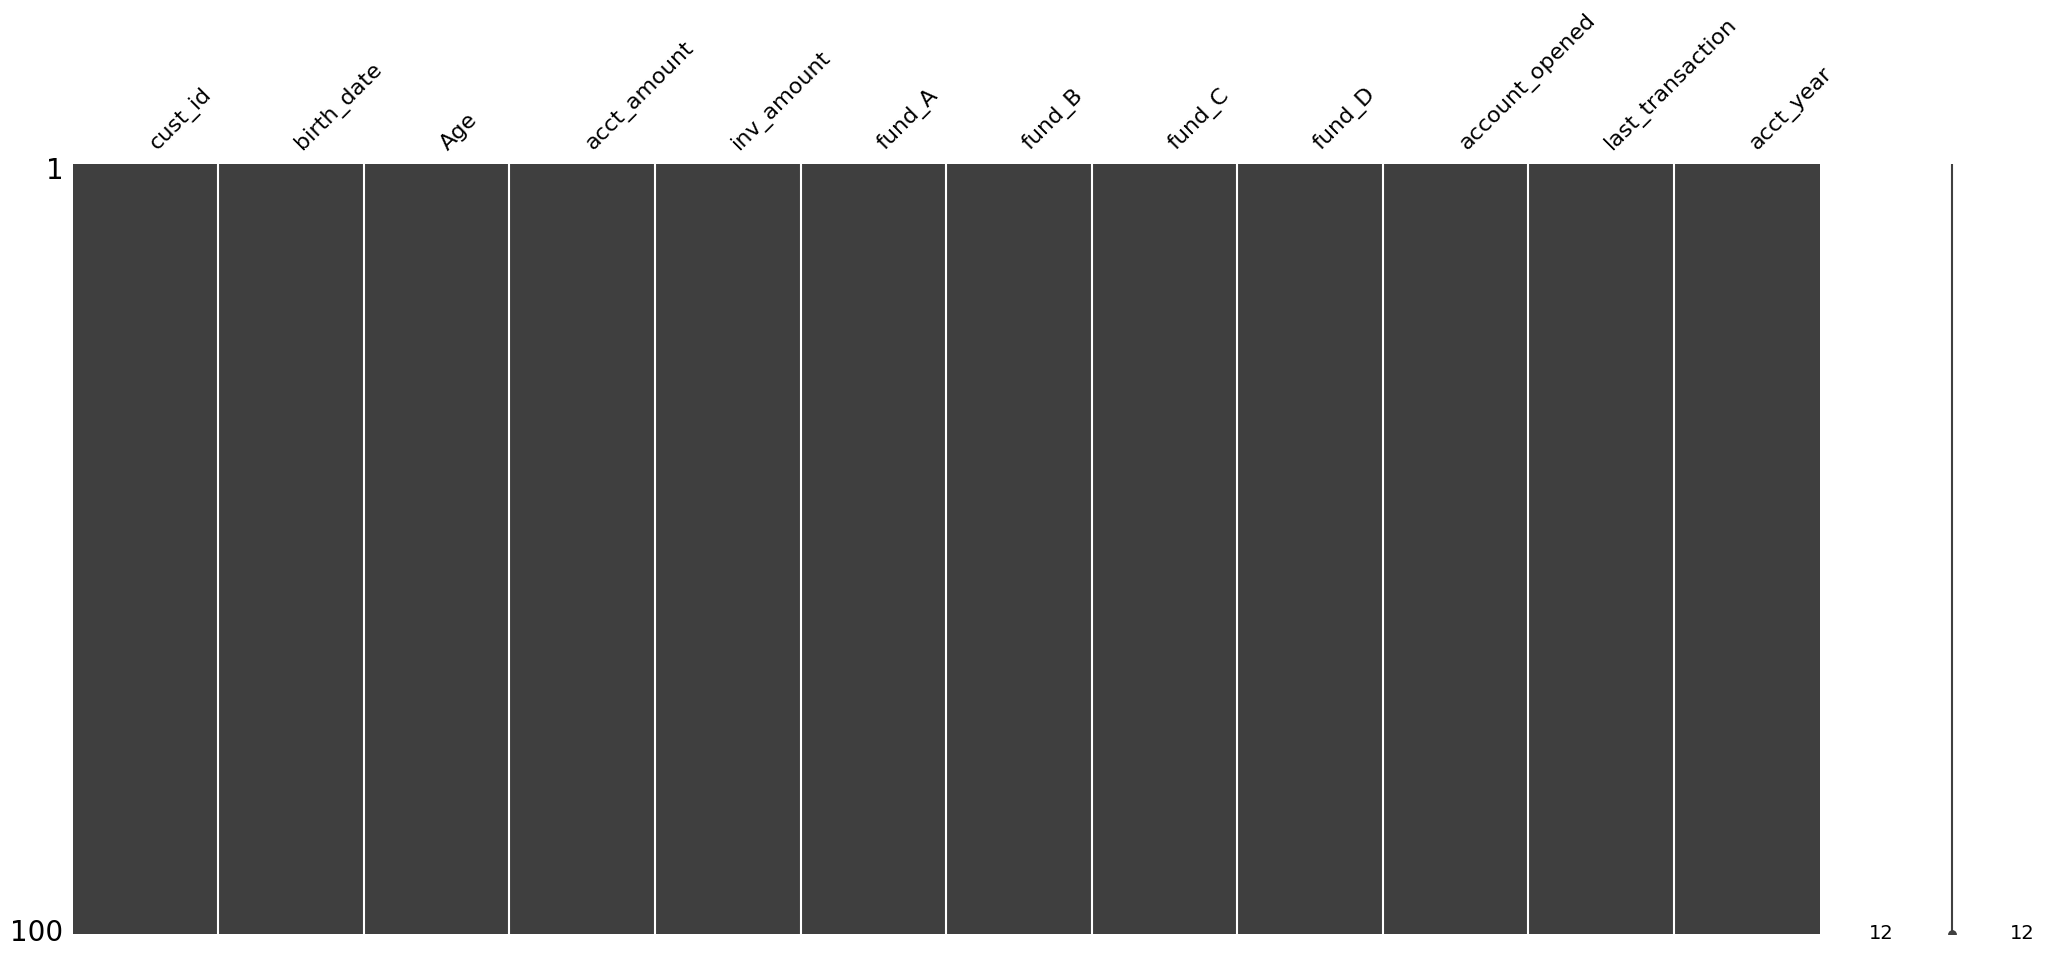

In [43]:
# Visualize missingness matrix
msno.matrix(banking)
plt.show()

In [44]:
# Isolate missing and non missing values of inv_amount
missing_investors = banking[banking['inv_amount'].isna()]
investors = banking[~banking['inv_amount'].isna()]

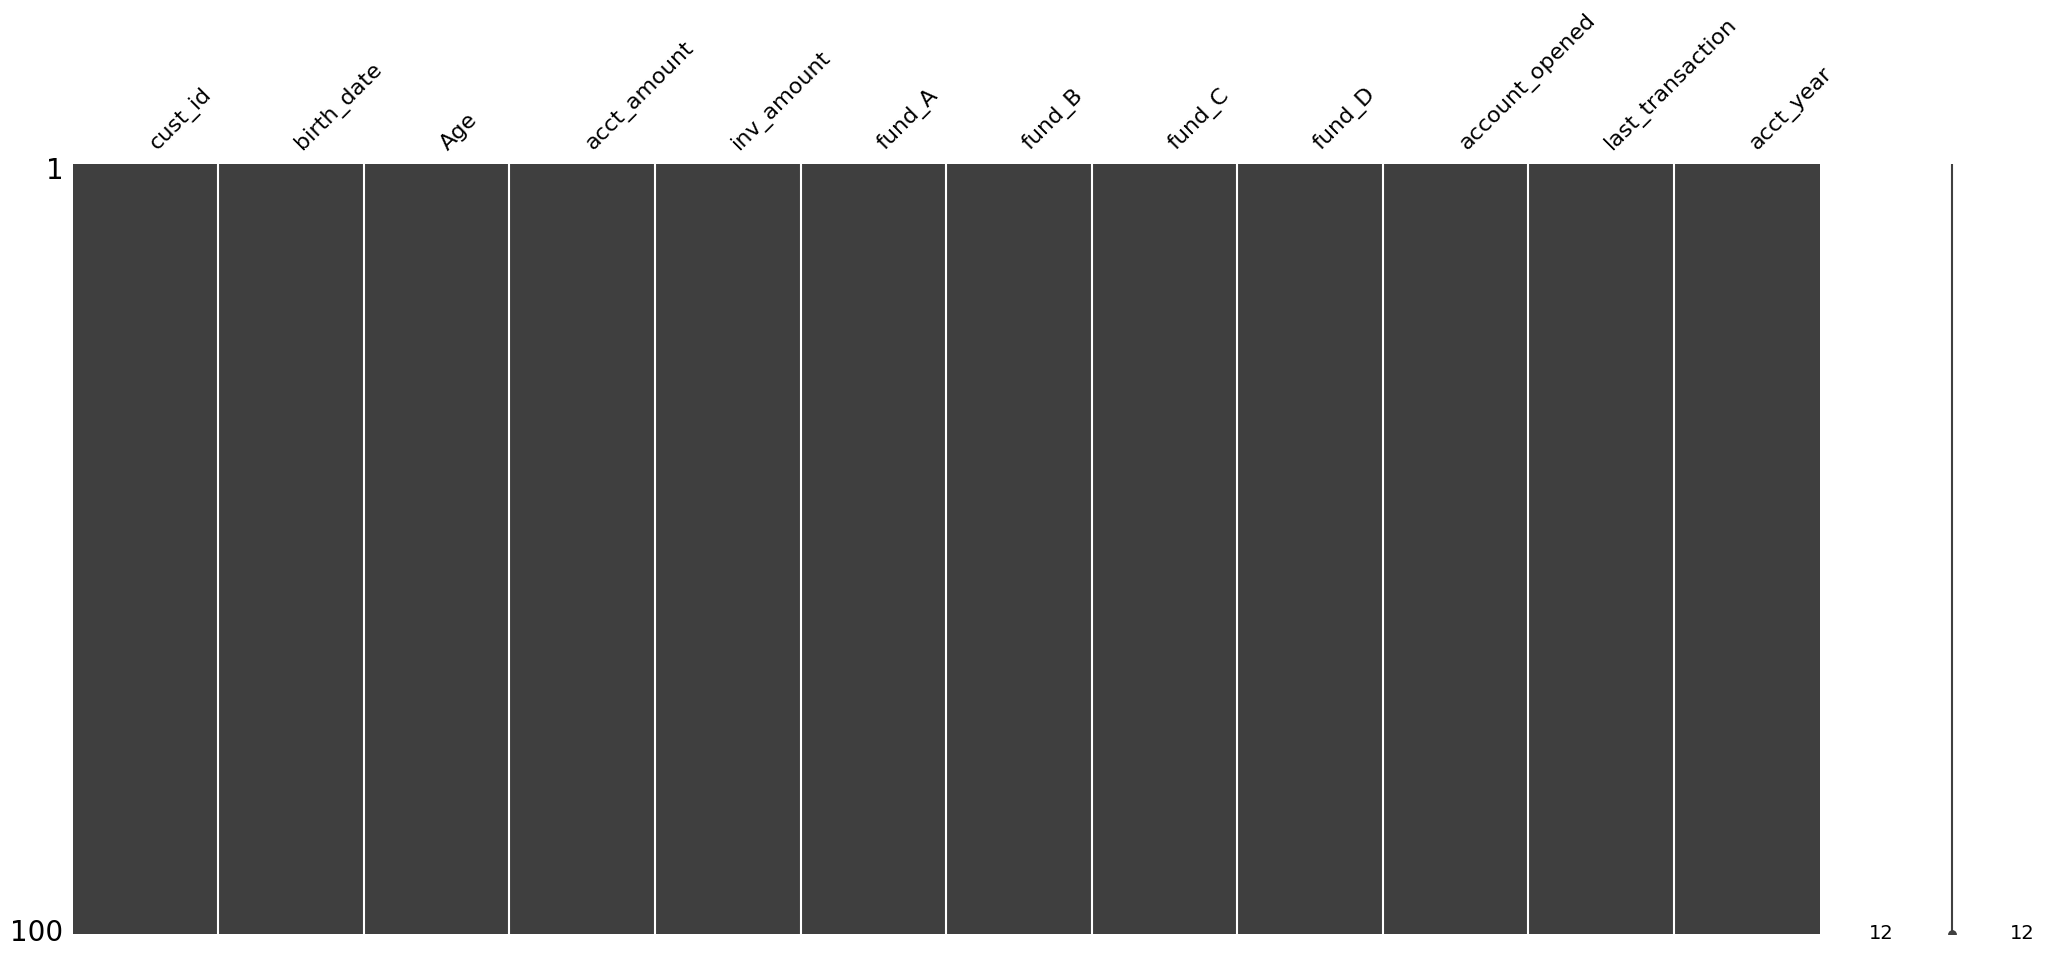

In [45]:
# Sort banking by age and visualize
banking_sorted = banking.sort_values(by='Age')
msno.matrix(banking_sorted)
plt.show()

In [46]:
# Drop missing values of cust_id
banking_fullid = banking.dropna(subset = ['cust_id'])

# Compute estimated acct_amount
acct_imp = banking_fullid['inv_amount'] * 5

# Impute missing acct_amount with corresponding acct_imp
banking_imputed = banking_fullid.fillna({'acct_amount':acct_imp})

# Print number of missing values
print(banking_imputed.isna().sum())

cust_id             0
birth_date          0
Age                 0
acct_amount         0
inv_amount          0
fund_A              0
fund_B              0
fund_C              0
fund_D              0
account_opened      0
last_transaction    0
acct_year           0
dtype: int64
